# **Credit Card Fraud Detection using Machine Learning and Time-Series Feature Engineering"💳**


---



Importing Dependencies

In [128]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report

## Data Loading, Cleaning & Basic Preprocessing

Load and Explore the Dataset

In [98]:
df=pd.read_csv('/content/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


> Class = 0 → Legitimate transaction (Not Fraud)

> Class = 1 → Fraudulent transaction

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [100]:
# checking dataset shape
df.shape

(284807, 31)

In [101]:
# displaying all columns names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Null Value Handling

In [102]:
# checking for missing values
df.isnull().sum().sum()

np.int64(0)

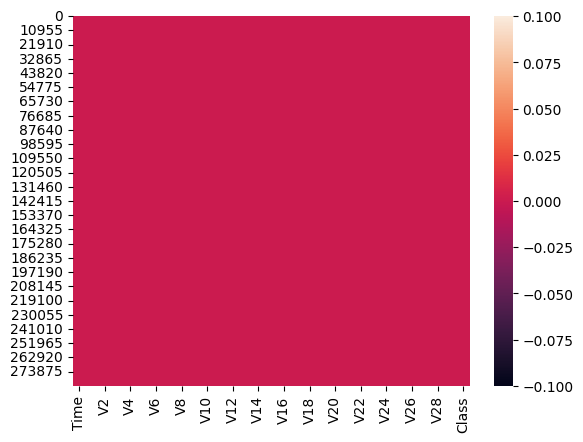

In [103]:
# heatmap for null values
sns.heatmap(df.isnull())
plt.show()

In [104]:
print('''
Dataset has no null values
''')


Dataset has no null values



Duplicate Check

In [105]:
# checking for duplicates
df.duplicated().sum()

np.int64(1081)

In [106]:
# droping duplicates
df.drop_duplicates(inplace=True)

# checking for duplicates
df.duplicated().sum()

np.int64(0)

Target Distribution

In [107]:
# Counting values of Class (fraud vs non-fraud)
df['Class'].value_counts()

,count
Class,
0,283253
1,473


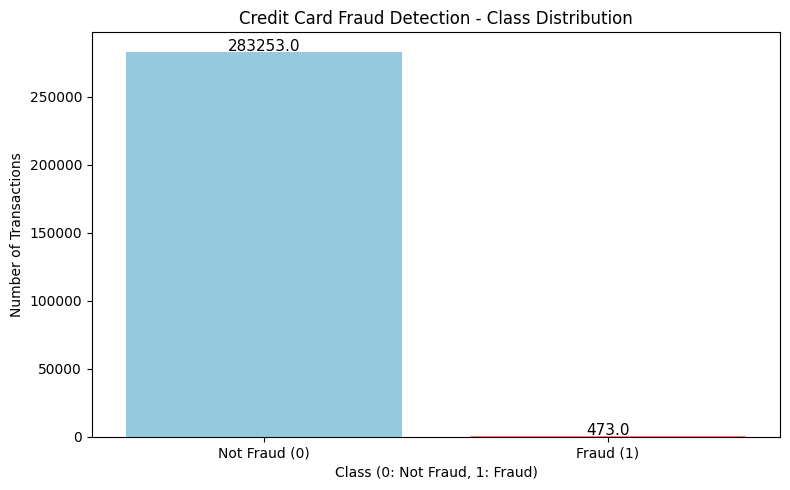

In [108]:
# Set the figure size for clarity
plt.figure(figsize=(8, 5))

# Updated countplot using 'hue' to avoid deprecation warning
ax = sns.countplot(x='Class', hue='Class', data=df, palette=['skyblue', 'salmon'], legend=False)

# Add labels and title
plt.title('Credit Card Fraud Detection - Class Distribution')
plt.xlabel('Class (0: Not Fraud, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])

# Annotate bars with count values
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height + 500),
                ha='center', fontsize=11)

plt.tight_layout()
plt.show()

Feature Scaling

In [109]:
# Scaling Amount and time and storing it in a new column
standard_scaler = StandardScaler()

df['scaled_amount'] = standard_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = standard_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244200,-1.996823
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342584,-1.996823
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.158900,-1.996802
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.139886,-1.996802
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073813,-1.996781


In [110]:
# Drop original Amount and Time its completely (optional)
df.drop(['Amount', 'Time'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781


In [111]:
# Drop rows where 'Class' is NaN
df = df.dropna(subset=['Class'])

In [112]:
print("NaNs in y (Class):", df['Class'].isna().sum())

NaNs in y (Class): 0


In [113]:
# seperating legit and fraud transactions
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

print(legit.shape)
print(fraud.shape)

(283253, 31)
(473, 31)


 Handling Imbalanced Data

undersampling

In [114]:
legit_sample=legit.sample(n=473)
new_df=pd.concat([legit_sample,fraud],axis=0)
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
228033,2.049501,-0.373037,-2.221788,-0.659396,0.303634,-1.325275,0.553909,-0.399749,0.420427,0.018895,...,0.441224,-0.104818,-0.242072,0.280386,1.075167,-0.158014,-0.099822,0,-0.163909,1.064025
35638,0.694442,-0.448280,1.420216,3.084830,-0.924522,0.744530,-0.392957,0.237220,0.317889,0.236383,...,0.552456,-0.227811,0.469776,0.454562,0.201434,0.035282,0.059901,0,0.376708,-1.192185
225935,-0.767973,-0.467711,1.374849,-2.354602,0.197287,-0.336371,-0.473390,0.363212,-0.755649,0.134246,...,-0.056309,0.105609,0.639026,-0.440760,-0.626014,0.347428,0.216987,0,-0.333399,1.045470
23691,-0.704544,0.853970,1.212280,0.791834,0.447744,0.225036,0.926386,0.124053,-1.010589,-0.047292,...,-0.982991,0.099097,-0.392526,0.239395,-0.557780,-0.092405,-0.060139,0,-0.112112,-1.304524
163748,0.146319,1.060890,-0.444957,-0.569694,0.999396,-0.755264,1.027584,-0.137094,-0.125745,-0.854688,...,-0.810232,0.086857,0.487435,-0.385494,0.117031,0.224098,0.084802,0,-0.321058,0.450031


In [115]:
new_df.shape

(946, 31)

In [116]:
new_df['Class'].value_counts()

,count
Class,
0,473
1,473


## EDA + Feature Engineering

Visual Exploration

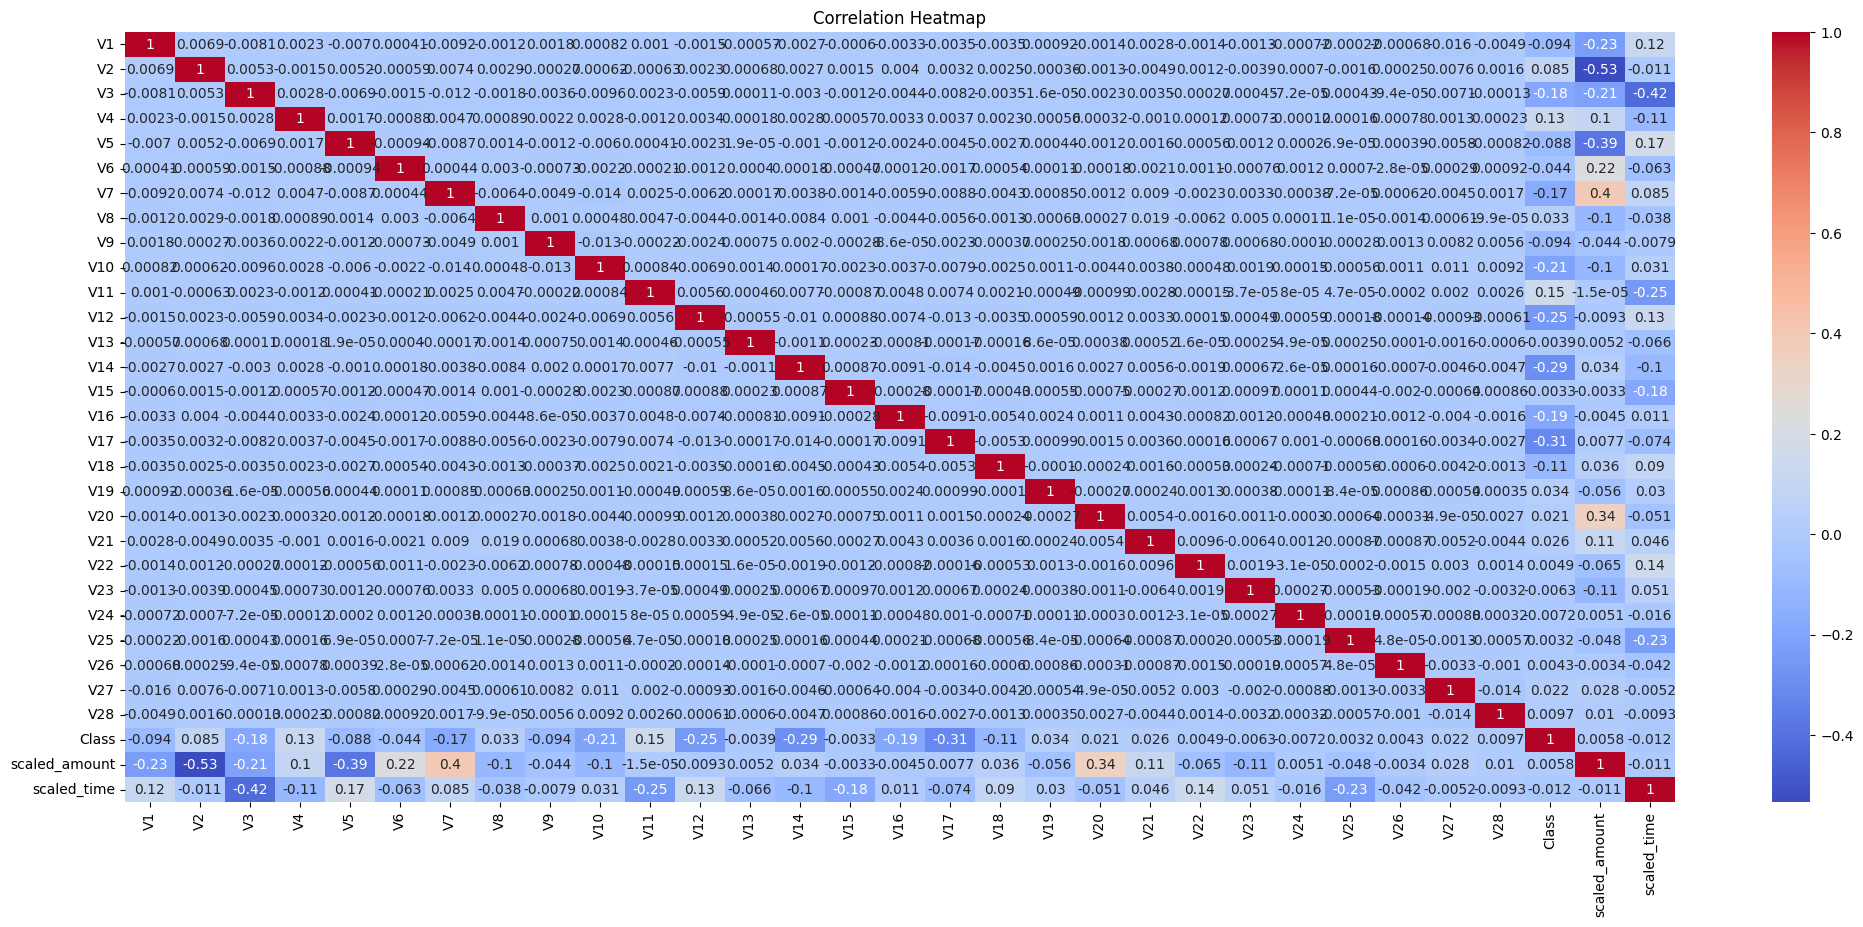

In [117]:
# Visualize correlations using sns.heatmap()
plt.figure(figsize=(25, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [118]:
# Step 1: Compute correlation matrix
corr_matrix = df.corr()

# Step 2: Get correlation with target column 'Class'
class_corr = corr_matrix['Class'].sort_values(key=abs, ascending=False)

# Step 3: Filter features with high correlation (e.g., |correlation| > 0.1)
high_corr_features = class_corr[abs(class_corr) > 0.1]

# Step 4: Print result
print("Highly correlated features with 'Class':")
print(high_corr_features)


Highly correlated features with 'Class':
Class    1.000000
V17     -0.313498
V14     -0.293375
V12     -0.250711
V10     -0.206971
V16     -0.187186
V3      -0.182322
V7      -0.172347
V11      0.149067
V4       0.129326
V18     -0.105340
Name: Class, dtype: float64


## Train-Test Split

In [119]:
# splitting the data into training and testing sets and Stratify on Class to maintain fraud ratio
X=new_df.drop(columns='Class',axis=1)
y=new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (756, 30) (756,)
Testing set shape: (190, 30) (190,)


In [120]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

## Evaluating the model based on Accuracy score

In [121]:
# Evaluating the model based on Accuracy score
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,y_train)
print('Accuracy on Training data : ', training_data_accuracy*100)

Accuracy on Training data :  95.63492063492063


In [122]:
# Accuracy on test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,y_test)
print('Accuracy on Test data : ', test_data_accuracy*100)

Accuracy on Test data :  94.73684210526315


In [123]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[93  2]
 [ 8 87]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.98      0.92      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



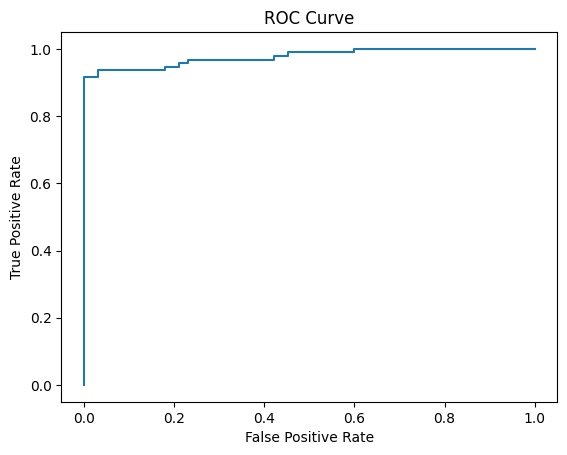

ROC-AUC Score: 97.72853185595568


In [124]:
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print("ROC-AUC Score:", roc_auc_score(y_test, y_probs)*100)

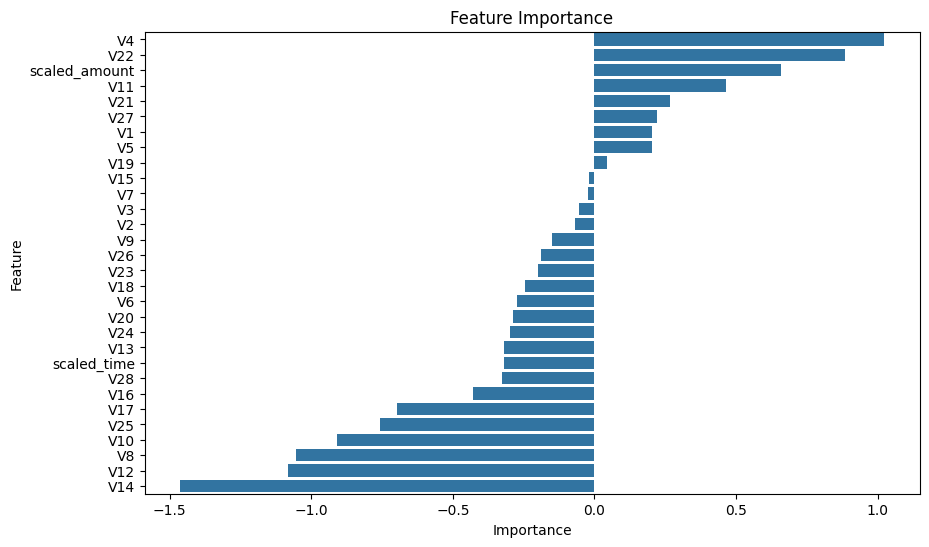

In [127]:
# Visualizing most important features  Feature Importance
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## Saving the model using pickle

In [129]:
# Save the model using pickle
pickle.dump(model, open('model.pkl', 'wb'))